Feature dimension: 64
PCA explained variance ratio: [0.12130907 0.09838538]
PCA total explained variance (2D): 0.21969445649156927


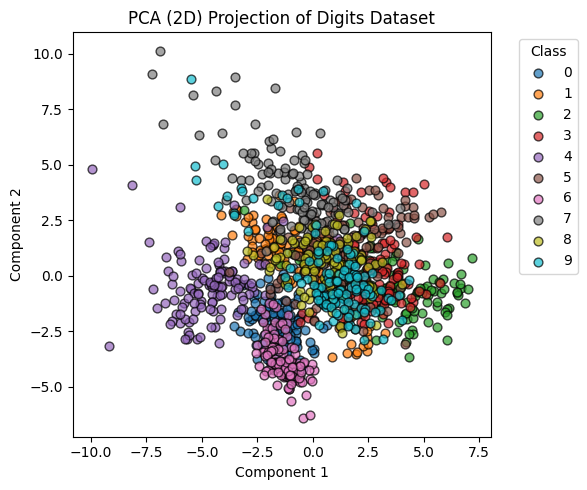

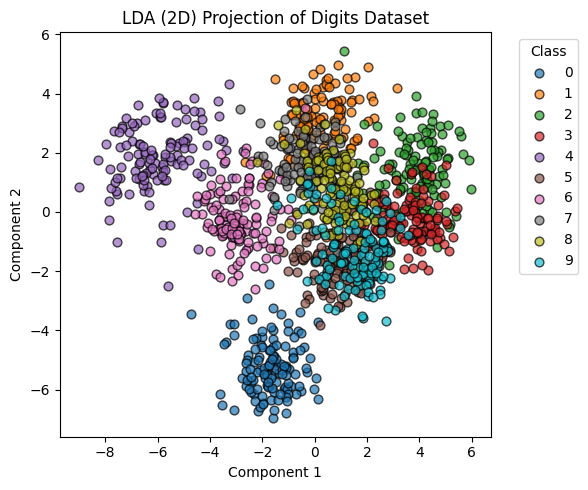

In [1]:
# Dimensionality Reduction with PCA and LDA
# Objective: Apply PCA and LDA on a high-dimensional dataset and visualize the results

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

# 1. Load a high-dimensional dataset
# The digits dataset has 1797 samples and 64 features (8x8 images flattened)
digits = load_digits()
X = digits.data        # shape: (n_samples, 64)
y = digits.target      # shape: (n_samples,)

print("Feature dimension:", X.shape[1])

# 2. Split into train and test (LDA is supervised and fits on training data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Standardize features (important for PCA and LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 4. PCA: Unsupervised dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_std)

print("PCA explained variance ratio:", pca.explained_variance_ratio_)
print("PCA total explained variance (2D):", np.sum(pca.explained_variance_ratio_))

# 5. LDA: Supervised dimensionality reduction to 2 components
# For LDA, max components = n_classes - 1; here 10 classes -> max 9, so 2 is valid
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_train_std, y_train)

# 6. Visualization helper function
def plot_2d_projection(X_2d, y, title):
    plt.figure(figsize=(6, 5))
    classes = np.unique(y)
    for cls in classes:
        plt.scatter(
            X_2d[y == cls, 0],
            X_2d[y == cls, 1],
            label=str(cls),
            alpha=0.7,
            edgecolor='k',
            s=40
        )
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(title)
    plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 7. Plot PCA 2D projection
plot_2d_projection(X_pca, y_train, "PCA (2D) Projection of Digits Dataset")

# 8. Plot LDA 2D projection
plot_2d_projection(X_lda, y_train, "LDA (2D) Projection of Digits Dataset")
